<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.11.0
Tensorflow version:  2.11.0


In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# insert code here
diabetes = load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [6]:
# insert code here

X = diabetes.data

print("X is a ", type(X))

print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

n_cols = X.shape[1]

y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [7]:
len(y)

442

In [8]:
y.shape

(442,)

### Split the data (training/test)

In [9]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [10]:
# insert code here
model = Sequential()

In [12]:
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))

model.add(Dense(5, activation = 'relu'))

model.add(Dense(1, activation = "linear"))

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [15]:
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [16]:
%%time

history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 0)

Wall time: 2min 12s


### Create predictions

In [17]:
# insert code here
predictions = np.argmax(model.predict(X_test), axis=-1)

5/5 [==============================] - 0s 4ms/step


### Evaluate the model

In [18]:
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 4ms/step - loss: 3310.7217 - mse: 3310.7217

Test loss: 3310.721680


In [19]:
score

[3310.7216796875, 3310.7216796875]

In [20]:
score[0] ** (1/2)

57.53887103243771

In [21]:
y.mean()

152.13348416289594

In [22]:
y.std()

77.00574586945044

In [23]:
y.min()

25.0

In [24]:
y.max()

346.0

### Visualisation of cost

In [25]:
# insert code here
history.history

{'loss': [28742.400390625,
  28707.61328125,
  28654.923828125,
  28566.677734375,
  28403.64453125,
  28097.224609375,
  27555.376953125,
  26685.072265625,
  25355.7734375,
  23578.16015625,
  21232.958984375,
  18492.298828125,
  15537.3916015625,
  12369.4033203125,
  9572.8125,
  7341.568359375,
  5916.046875,
  5056.6083984375,
  4620.07861328125,
  4422.21923828125,
  4327.234375,
  4262.55859375,
  4193.7451171875,
  4130.73779296875,
  4067.617431640625,
  4012.411376953125,
  3967.697265625,
  3917.042236328125,
  3866.265380859375,
  3819.48681640625,
  3778.445556640625,
  3741.568115234375,
  3700.9189453125,
  3673.947509765625,
  3641.658203125,
  3599.6259765625,
  3582.98486328125,
  3558.871826171875,
  3539.48291015625,
  3501.68408203125,
  3475.918212890625,
  3453.767578125,
  3434.063232421875,
  3408.5283203125,
  3390.907470703125,
  3380.218017578125,
  3353.56640625,
  3331.68212890625,
  3310.739013671875,
  3292.120361328125,
  3262.696533203125,
  3253.048

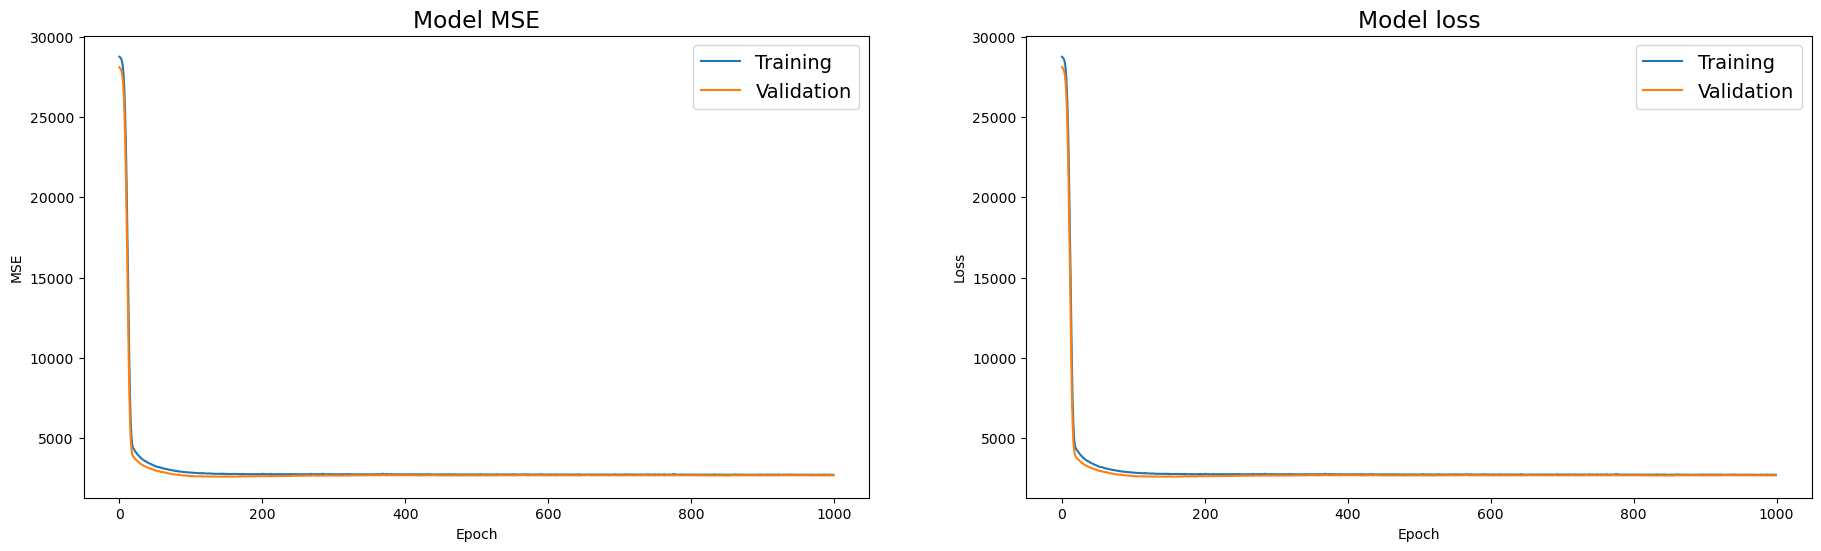

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [27]:
r2 = r2_score(y_test, predictions)
n, p = X.shape 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

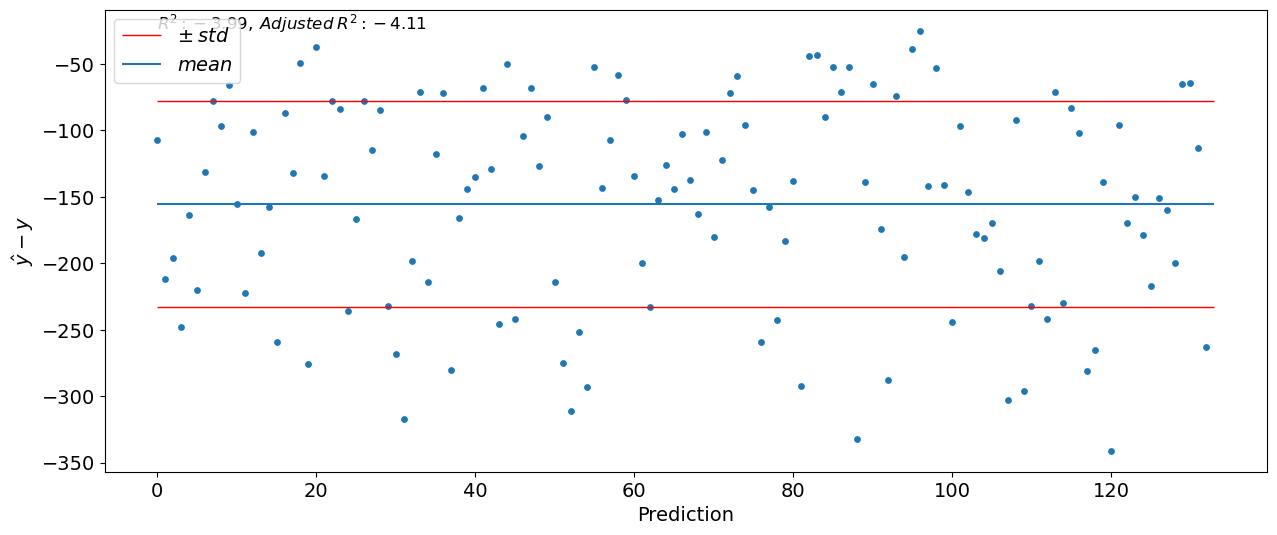

In [28]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



